In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/train.csv")


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
206554,206554,310008,310009,When crude oil prices will be stabilise?,When will the crude oil price stabilize?,1
64585,64585,112210,112211,What are some good Python tutorials for workin...,What is a good tutorial on Python Django?,0
202079,202079,304251,304252,What are the best Android phone in India with ...,"I love Maths and Chemistry, which medical cour...",0
227144,227144,335910,35793,A fair coin is flipped ten times. What is the ...,A fair coin is flipped 10 times. What is the p...,0
198819,198819,300146,11886,Which are the best places to visit in Finland?...,Which are the best places to visit in Denmark?...,0
271722,271722,8325,269034,What is the effect of black money on India's m...,How does black money impact a nation's economy?,1
54314,54314,95899,95900,Does CoCubes conduct Schneider’s online test?,How can I get myself safelisted on MailChimp?,0
119096,119096,193441,193442,How can I access and use Kik Messenger from a ...,Can Dropbox be used to download Kik Messenger?,0
365869,365869,404261,496008,Why does Omegle always make me solve a Captcha...,Do Indian women use Omegle?,0
26638,26638,49549,49550,When will Pakistan and India become friendly a...,What will happen if India and Pakistan are a f...,1


In [ ]:
# look like binary classifiaction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
#checking  duplicate row
df.duplicated().sum()

0

In [ ]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<Axes: >

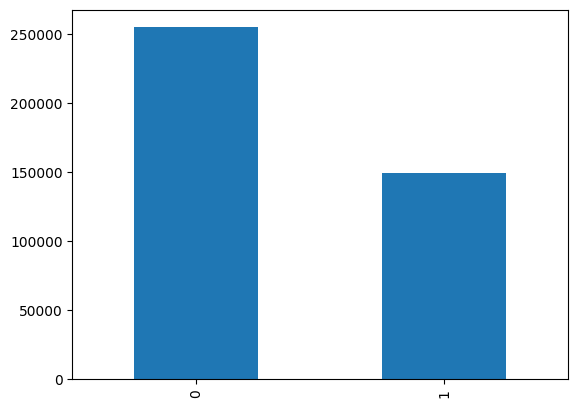

In [ ]:
df.is_duplicate.value_counts().plot(kind='bar')

In [ ]:
(df.is_duplicate.value_counts()/df.is_duplicate.count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

In [ ]:
# data look like imbalanced some

In [ ]:
# unique question and repeated question
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
uni_que = np.unique(qid).shape[0]
print("unique question :",uni_que)
rep = qid.value_counts()>1
rep_que = rep[rep].shape[0]
print("repeated question :",rep_que)


unique question : 537933
repeated question : 111780


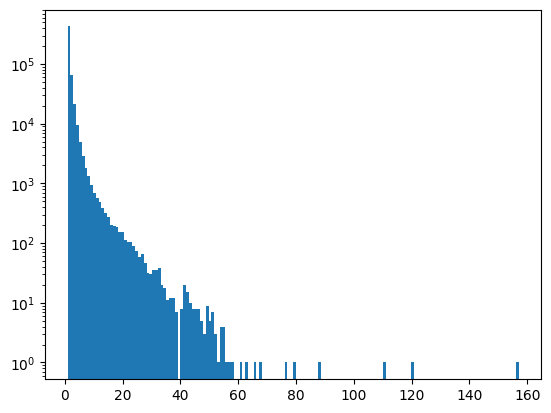

In [ ]:
# reapated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
#breaking data into smaller part
new_df = df.sample(30000,random_state=2)

# Basic Modelling || Only BOW

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
que_df = new_df[['question1','question2']]

In [ ]:
que_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:


from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(que_df['question1']) + list(que_df['question2'])
print(questions)
cv = CountVectorizer(max_features=3000)
#print(cv.fit_transform(questions))
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= que_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= que_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df['is_duplicate'] = new_df["is_duplicate"]

In [ ]:
temp_df.shape

(30000, 6001)

In [ ]:
X = temp_df.iloc[:,0:-1].values
y = temp_df.iloc[:,-1].values


In [ ]:
print(X.shape)
print(y.shape)

(30000, 6000)
(30000,)


In [ ]:
#Spliting Data into tarin and test

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Model 1 : Random Forest

# from sklearn.ensemble import  RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)
# print("accuracy of RF is :",accuracy_score(y_test,y_pred)*100)

In [ ]:
# Model 2 : xgboost

# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(X_train,y_train)
# y_pred = xgb.predict(X_test)
# print("accuracy of RF is :",accuracy_score(y_test,y_pred)*100)

# Now Going to add more feature || BOW With Feature

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [ ]:
new_df.shape

(30000, 6)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
# Distribution of duplicate and non-duplicate questions
new_df.is_duplicate.value_counts()

0    19013
1    10987
Name: is_duplicate, dtype: int64

In [ ]:
# percentage of duplicate que vs not duplicate
(new_df.is_duplicate.value_counts()/new_df.is_duplicate.count())*100

0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64

<Axes: >

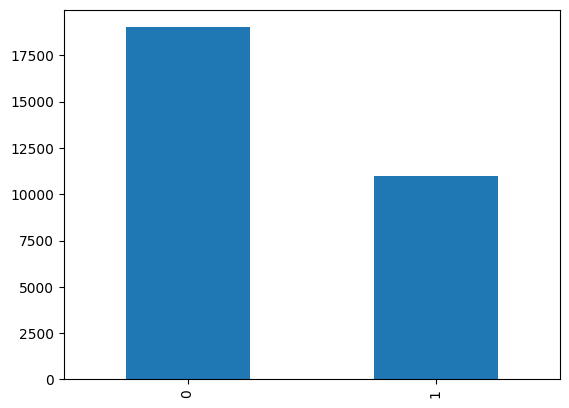

In [ ]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions repeated 3480


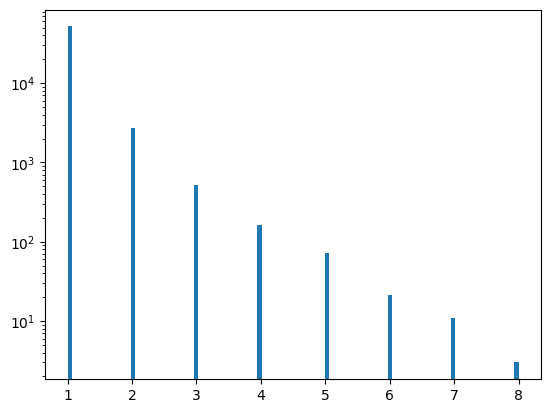

In [ ]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [ ]:
## Feature Engineering

In [ ]:
# adding question len  into new column
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [ ]:
# adding number of word into new column
new_df['q1_word_count'] = new_df['question1'].apply(lambda row:len(row.split()))
new_df['q2_word_count'] = new_df['question2'].apply(lambda row:len(row.split()))

In [ ]:
a = list(map(lambda word:word.lower().strip(),"Ram is God & He is idol of every human being .".split(" ")))
b = list(map(lambda word:word.lower().strip(),"Ram is Good Boy & He is  naughty .".split(" ")))
print((set(a) & set(b)),len((set(a) & set(b))))

{'.', 'is', 'he', 'ram', '&'} 5


In [ ]:
# finding common word into both question

def common_word(row):
  w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df['num_common_word'] = new_df.apply(common_word,axis=1)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,num_common_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [ ]:
# finding total word into both question

w1 = set(map(lambda word:word.lower().strip(),"Ram is God & He is idol of every  human being .".split(" ")))
w2 = set(map(lambda word:word.lower().strip(),"Ram is God & He is idol".split(" ")))
print(len(w1) +  len(w2))

18


In [ ]:
def total_word(row):
  w1 = list(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2 = list(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return(len(w1)+len(w2))


In [ ]:
new_df['total_word_count'] = new_df.apply(total_word,axis=1)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,num_common_word,total_word_count
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,27
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,42
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,42
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,14


In [ ]:
new_df['word_share'] = round(new_df["num_common_word"]/new_df['total_word_count'],2)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,num_common_word,total_word_count,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,27,0.26
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,42,0.05
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,42,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,14,0.21


**Basic EDA**

min len of char: 2
max len of char: 391
avg len of char: 59


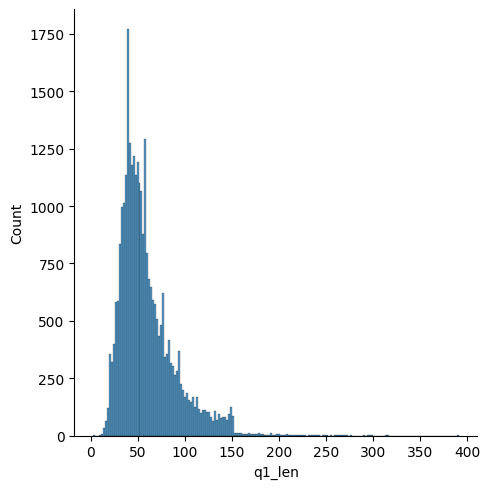

In [ ]:
sns.displot(new_df.q1_len)
print("min len of char:",new_df.q1_len.min())
print("max len of char:",new_df.q1_len.max())
print("avg len of char:",int(new_df.q1_len.mean()))

min len of char: 6
max len of char: 1151
avg len of char: 60


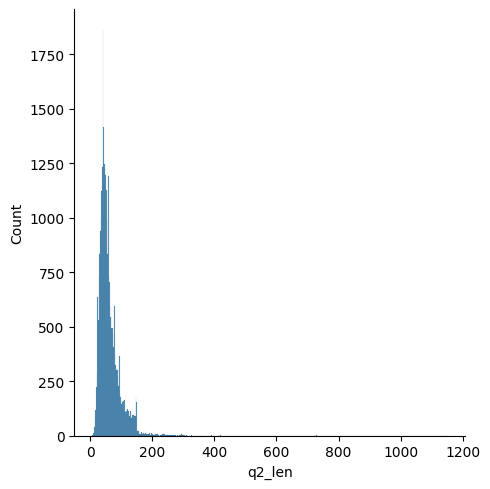

In [ ]:
sns.displot(new_df.q2_len)
print("min len of char:",new_df.q2_len.min())
print("max len of char:",new_df.q2_len.max())
print("avg len of char:",int(new_df.q2_len.mean()))

min len of char: 1
max len of char: 72
avg len of char: 10


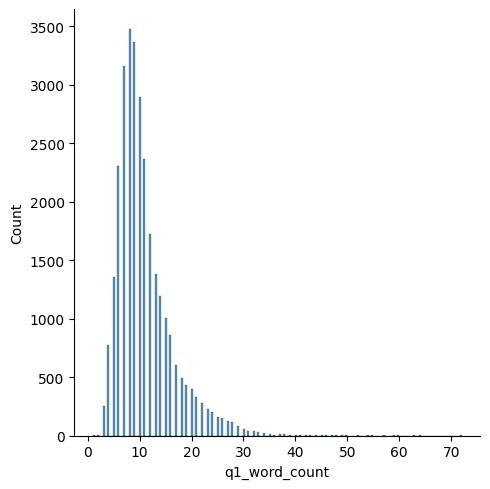

In [ ]:
sns.displot(new_df.q1_word_count)
print("min len of char:",new_df.q1_word_count.min())
print("max len of char:",new_df.q1_word_count.max())
print("avg len of char:",int(new_df.q1_word_count.mean()))

In [ ]:
print(new_df.columns)

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_word_count', 'q2_word_count', 'num_common_word',
       'total_word_count', 'word_share'],
      dtype='object')


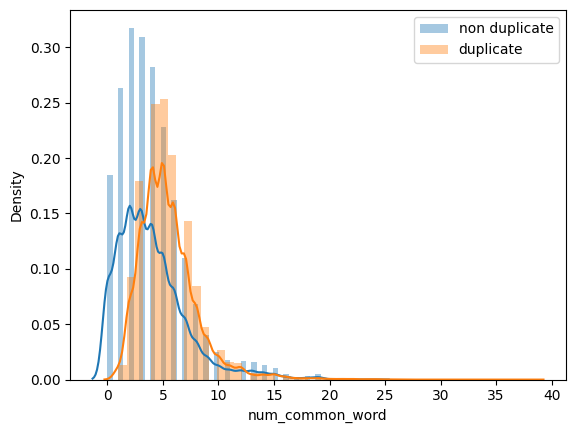

In [ ]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['num_common_word'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['num_common_word'],label='duplicate')
plt.legend()
plt.show()

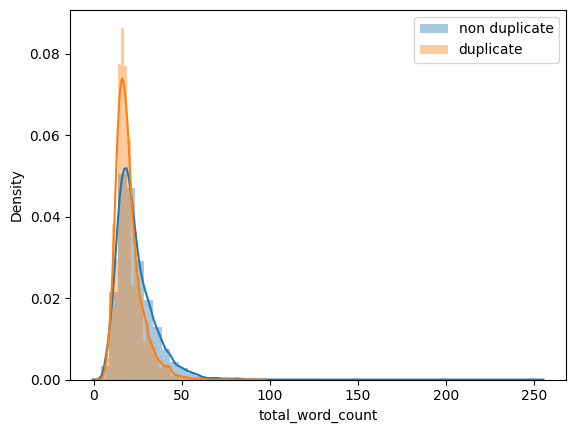

In [ ]:
# total words count
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_word_count'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_word_count'],label='duplicate')
plt.legend()
plt.show()

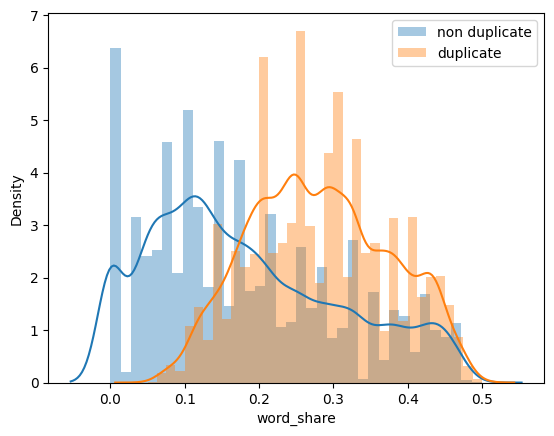

In [ ]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['question1','question2']]
print(ques_df.shape)

(30000, 2)


In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)


(30000, 8)


In [ ]:
# imp step , abf
from sklearn.feature_extraction.text import CountVectorizer
questions = list(que_df.question1)+list(que_df.question2)
# print(len(questions)) -- 60000
cv = CountVectorizer(max_features=3000)
# vocab = cv.get_feature_names_out()   -- 26218 UNIQUE WORD
q1_arr,q2_arr= np.vsplit(cv.fit_transform(questions).toarray(),2)
print("q1_arr shape",q1_arr.shape)
print("q2_arr shape",q2_arr.shape)

q1_arr shape (30000, 3000)
q2_arr shape (30000, 3000)


In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
# print(temp_df1)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,num_common_word,total_word_count,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,27,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,42,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,42,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = final_df.iloc[:,1:].values
y = final_df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#Model 1 : RF
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("accuracy of RF is :",accuracy_score(y_test,y_pred)*100)

accuracy of RF is : 76.31666666666666


In [ ]:
#Model 2 : XGBOOST
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(X_train,y_train)
# y_pred = xgb.predict(X_test)
# print("accuracy of RF is :",accuracy_score(y_test,y_pred)*100)